# Rankine-syklus

Denne notatboka omhandler analyse av Rankine-syklusen ved hjelp av [CoolProp](http://www.coolprop.org/). Før du går gjennom notatboka, kan det lønne seg å se gjennom [notatboka som introduserer CoolProp](./introduction-coolprop.ipynb), forelesningsnotatene om Rankine-syklus og øvingsoppgavene om Rankine-syklus (Øving 7).

I denne notatboka er nødvendig kode i utgangspunktet ferdigutfylt, med mulighet for å supplere med egne utvidelser. Oppgavene går ut på å sammenligne Python-analysen med beregningene gjort i Øving 7 og diskutere betydningen av ulike parametere for prosessytelsen. Oppgavene er gitt i egne bokser, som illustrert nedenfor, etterfulgt av egne celler hvor oppgavene kan besvares med tekst.

<div class="alert alert-block alert-info">
<b>Oppgaveformat</b>
<br>Oppgavene er formatert i slike bokser
</div>

Notatboka består av tre deler. Første deler omhandler analyse av en enkel, ideell Rankine-syklus, andre del omhandler analyse av en enkel Rankine-syklus med tap (i pumpe og kompressor). og tredje del omhandler analyse av en ideell Rankine-syklus med mellomheting. Analysene omfatter Ts-diagram og beregning av termisk virkningsgrad.

---

## Enkel, ideell Rankine-syklus

En enkel Rankine-syklus er illustrert i figuren nedenfor.

![Enkel Rankine-syklus](../Figures/rankine-simple.png)

Den enkle, ideelle Rankine-syklusen består av fire internt reversible delprosesser:
- 1&rarr;2: Pumpe: Isentropisk kompresjon
- 2&rarr;3: Kjel: Isobar oppvarming
- 3&rarr;4: Turbin: Isentropisk ekspansjon
- 4&rarr;1: Kondensator: Isobar nedkjøling


In [ ]:
#CoolProp is not part of the NTNU JupyterHub setup and must be installed
#every time the hub is activated to run the code
!pip install coolprop

In [1]:
#Importing necessary Python libraries
import numpy as np #Mathematical operations 
import matplotlib.pyplot as plt #Plotting
import CoolProp as CP #Thermodynamic data
from CoolProp.CoolProp import PropsSI #Thermodynamic data, properties
from CoolProp.CoolProp import PhaseSI #Thermodynamic data, phase
import ipywidgets as widgets #Interactive functions

In [2]:
#Diagram settings
plt.rcParams['figure.figsize']=(16,12) #Figure dimensions
plt.rcParams['font.size']='14' #Font size

### Termisk virkningsgrad

Den termiske virkningsgraden er definert som 
$$ \eta_{\mathrm{th}} = \frac{\dot W_{\mathrm{netto}}}{\dot Q_{\mathrm{inn}}} $$ 
der $\dot W_{\mathrm{netto}} = \dot W_{\mathrm{t}} - \dot W_{\mathrm{p}} = \dot Q_{\mathrm{inn}} - \dot Q_{\mathrm{ut}}$ er netto levert effekt (arbeidsrate) og $\dot Q_{\mathrm{inn}}$ er tilført varmestrøm.

Fra energibalansen for de ulike delprosessene (gitt stasjonær tilstand, ingen varmetap til omgivelsene og neglisjerbar effekt av kinetisk og potensiell energi), er det gitt at 
$$ \dot W_{\mathrm{p}} = \dot m \cdot (h_2 - h_1), \\ 
\dot Q_{\mathrm{inn}} = \dot m \cdot (h_3 - h_2), \\ 
\dot W_{\mathrm{t}} = \dot m \cdot (h_3 - h_4), \\ 
\dot Q_{\mathrm{ut}} = \dot m \cdot (h_4 - h_1), \\ $$
der $\dot m$ er massestrømmen og $h_i$ er den spesifikke entalpien i tilstand $i$.

Den termiske virkningsgraden kan for den enkle Rankine-syklusen derfor uttrykkes som 
$$ \eta_{\mathrm{th}} = \frac{(h_3-h_4)-(h_2-h_1)}{h_3-h_2}. $$

---

For å finne den termiske virkningsgraden må vi derfor først finne den spesifikke entalpien i de fire tilstandene. For å kunne fastsette en tilstand, må vi kjenne to egenskaper. I dette tilfellet antar vi at følgende informasjon er oppgitt for prosessen:
- Tilstand 1: Mettet væske (*x*<sub>1</sub> = 0) ved kjent trykk (*p*<sub>1</sub> = *p*<sub>L</sub>)
- Tilstand 2: Isentropisk prosess 1&rarr;2 (*s*<sub>2</sub> = *s*<sub>1</sub>) til kjent trykk (*p*<sub>2</sub> = *p*<sub>H</sub>)
- Tilstand 3: Isobar prosess 2&rarr;3 (*p*<sub>3</sub> = *p*<sub>2</sub>) til kjent temperatur (*T*<sub>3</sub> = *T*<sub>max</sub>)
- Tilstand 4: Isentropisk prosess 3&rarr;4 (*s*<sub>4</sub> = *s*<sub>3</sub>) og isobar prosess 4&rarr;1 (*p*<sub>4</sub> = *p*<sub>1</sub>)

Funksjonen `PropsSI` benytter avledede SI-enheter og input til denne funksjonen må derfor være gitt i avledede SI-enheter. Funksjonen nedenfor beregner den termiske virkningsgraden som funksjon av lavtrykk (bar), høytrykk (bar) og kjeltemperatur (°C). Trykket og temperaturen må derfor konverteres til avledede SI-enheter inne i funksjonen. 

In [3]:
def thermalefficiency_rankine_ideal(pL,pH,Tmax):
    # Calculating the thermal efficiency of simple ideal 
    #Rankine cycle as a function of pL, pH and Tmax
    # pL: Low pressure level (bar)
    # pH: High pressure level (bar)
    # Tmax: Boiler temperature (°C)
    
    h1 = PropsSI('H','P',pL*1E5,'Q',0,'Water') #Specific enthalpy state 1 (J/kg)
    s1 = PropsSI('S','P',pL*1E5,'Q',0,'Water') #Specific entropy state 1 (J/kgK)
    h2 = PropsSI('H','P',pH*1E5,'S',s1,'Water') #Specific enthalpy state 2 (J/kg)
    h3 = PropsSI('H','P',pH*1E5,'T',Tmax+273.15,'Water') #Specific enthalpy state 3 (J/kg)
    s3 = PropsSI('S','P',pH*1E5,'T',Tmax+273.15,'Water') #Specific entropy state 3 (J/kgK)
    h4 = PropsSI('H','P',pL*1E5,'S',s3,'Water') #Specific enthalpy state 4 (J/kg)
    
    eta =((h3-h4)-(h2-h1))/(h3-h2) #Thermal efficiency
    return(eta)

In [4]:
def print_thermalefficiency_rankine_ideal(pL,pH,Tmax):
    #Printing the thermal efficiency of an ideal simple Rankine cycle
    eta = thermalefficiency_rankine_ideal(pL,pH,Tmax)
    print(f"Termisk virkningsgrad: {eta:.1%}")

In [5]:
#Testing the thermal efficiency function:
p1 = 0.01 #Condenser pressure (bar)
p2 = 150 #Boiler pressure (bar)
T3 = 600 #Boiler temperature (°C)
print_thermalefficiency_rankine_ideal(p1, p2, T3);

Termisk virkningsgrad: 48.0%


#### Interaktiv beregning av termisk virkningsgrad

I cellen nedenfor beregnes den termiske virkninsgraden med funksjonen `thermalefficiency` for justerbare verdier for lavtrykket, høytrykket og kjeltemperaturen.

In [6]:
#Thermal efficiency of an ideal simple Rankine cycle as function of
#condenser pressure, boiler pressure and boiler temperature

print('Enkel, ideell Rankine-syklus:')

widgets.interact(print_thermalefficiency_rankine_ideal, 
    pL = widgets.FloatSlider(value = 0.6, min = 0.1, max = 2.0, description = "$p_{\mathrm{L}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    pH = widgets.FloatSlider(value = 50, min = 40, max = 250, description = "$p_{\mathrm{H}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    Tmax = widgets.FloatSlider(value = 500, min = 300, max = 700, description = "$T_{\mathrm{max}} (\mathrm{\u00B0C})$", disabled = False, continuous_update = False)
                );

Enkel, ideell Rankine-syklus:


interactive(children=(FloatSlider(value=0.6, continuous_update=False, description='$p_{\\mathrm{L}} (\\mathrm{…

### Fasediagram

Nedenfor er prosessforløpet i den enkle, ideelle Rankine-syklusen plottet i et temperatur-entropi-diagram.

Funksjonen `tsdiagram` lager et generelt Ts-diagram med fasekonvolutten for et gitt fluid, mens funksjonen `rankinediagram` plotter den enkle, ideelle Rankine-syklusen i et Ts-diagram.

Prosessforløp i Ts-diagrammet:
- 1&rarr;2: Isentropisk kompresjon (rett linje, trenger kun endepunktene)
- 2&rarr;3: Isobar oppvarming (følger isobaren for høytrykket)
- 3&rarr;4: Isentropisk ekspansjon (rett linje, trenger kun endepunktene)
- 4&rarr;1: Isobar nedkjøling (følger isobaren for lavtrykket)



In [7]:
def tsdiagram(fluid):
    # Plotting Ts diagram for given fluid with phase envelope
    # fluid: Fluid name as string
    Tmin = 270
    Tmax = PropsSI('Tcrit',fluid) #Critical temperature
    temperature = np.linspace(Tmin,Tmax,1000)
    bubblepoint = PropsSI('S','T',temperature,'Q',0,fluid) #Bubblepoint curve (x = 0)
    dewpoint = PropsSI('S','T',temperature,'Q',1,fluid) #Dewpoint curve (x = 1)
    
    plt.plot(bubblepoint, temperature, color = 'C0', linewidth = 1)
    plt.plot(dewpoint, temperature, color = 'C0', linewidth = 1)
    plt.title('Temperatur-entropi-diagram')
    plt.xlabel('Spesifikk entropi (J/kgK)')
    plt.ylabel('Temperatur (K)')
    plt.show


In [8]:
def diagram_rankine_ideal(pL,pH,Tmax):
    # Plotting simple ideal Rankine cycle in Ts diagram
    # pL: Low pressure level (bar)
    # pH: High pressure level (bar)
    # Tmax: Boiler temperature (°C) 
    T1 = PropsSI('T','P',pL*1E5,'Q',0,'Water') #Temperature state 1
    s1 = PropsSI('S','P',pL*1E5,'Q',0,'Water') #Specific entropy state 1
    s2 = s1 #Specific entropy state 2
    T2 = PropsSI('T','P',pH*1E5,'S',s2,'Water') #Temperature state 2
    T3 = Tmax+273.15 #Temperature state 3
    s3 = PropsSI('S','P',pH*1E5,'T',Tmax+273.15,'Water') #Specific entropy state 3
    s4 = s3 #Specific entropy state 4
    T4 = PropsSI('T','P',pL*1E5,'S',s4,'Water') #Temperature state 4
    
    pump_entropy = [s1, s2] #Specific entropy 1->2
    pump_temperature = [T1, T2] #Temperature 1->2
    boiler_entropy = np.linspace(s2, s3, 1000) #Entropy 2->3
    boiler_temperature = PropsSI('T','P',pH*1E5,'S',boiler_entropy,'Water') #Temperature 2->3
    turbine_entropy = [s3, s4] #Specific entropy 3->4
    turbine_temperature = [T3, T4] #Temperature 3->4
    condenser_entropy = np.linspace(s1, s4, 1000) #Specific entropy 4->1
    condenser_temperature = PropsSI('T','P',pL*1E5,'S',condenser_entropy,'Water') #Temperature 4->1
 
    tsdiagram('Water')
    plt.plot(pump_entropy,pump_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(boiler_entropy,boiler_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(turbine_entropy,turbine_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(condenser_entropy,condenser_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    
    plt.annotate("1", (s1,T1), (s1+30,T1-30), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("2", (s2,T2), (s2-30,T2+30), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("3", (s3,T3), (s3-400,T3), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("4", (s4,T4), (s4+400,T4), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})

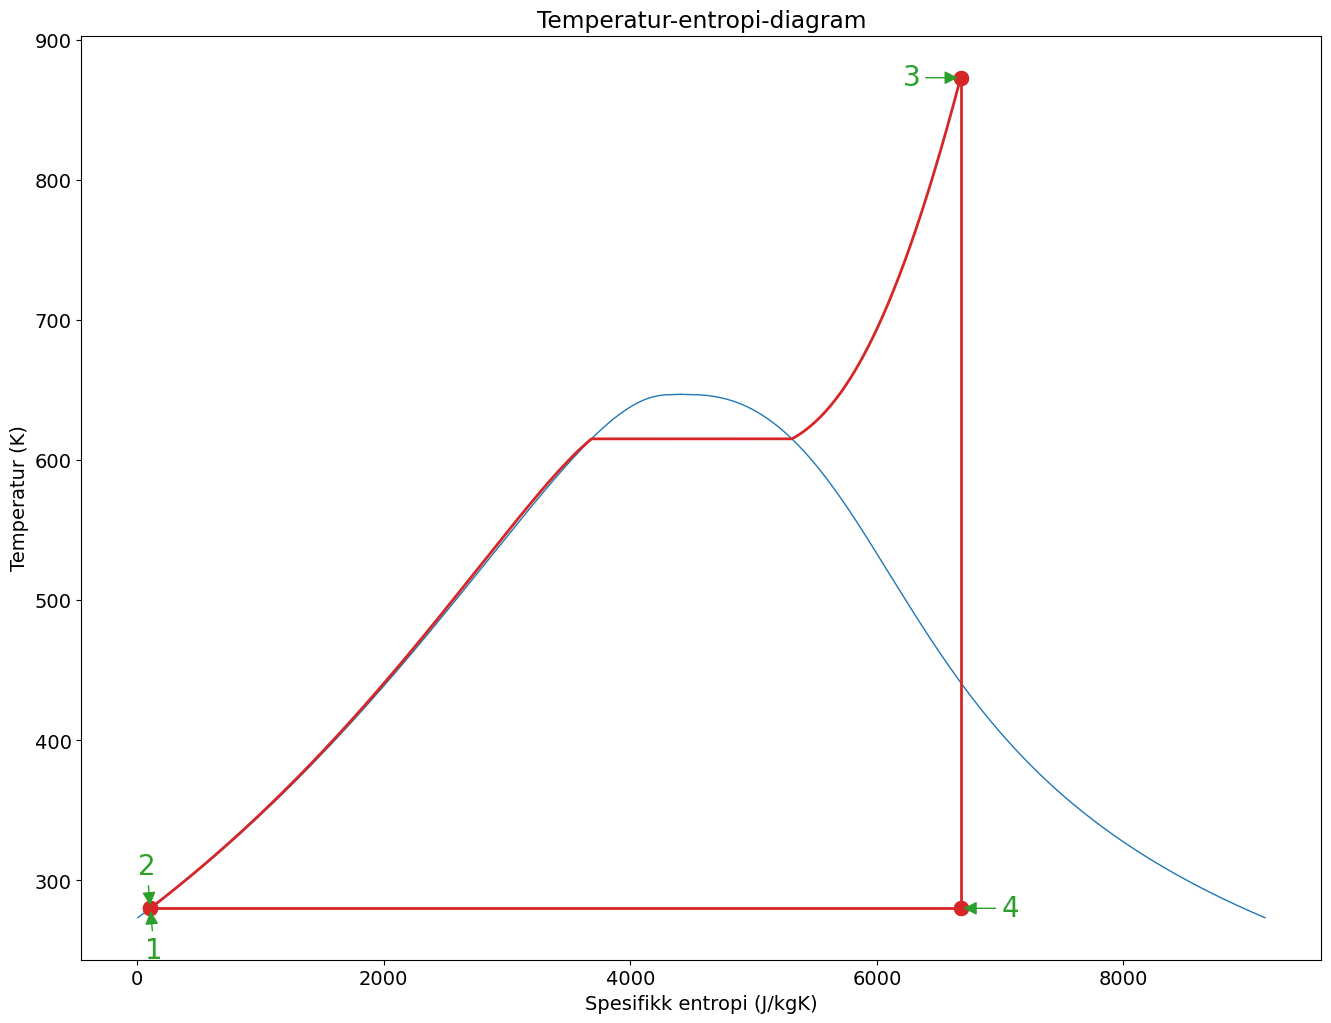

In [9]:
#Testing the Rankine diagram function:
diagram_rankine_ideal(p1,p2,T3)

In [10]:
#Ts diagram for ideal simple Rankine cycle as function of
#condenser pressure, boiler pressure and boiler temperature

print('Ts-diagram enkel, ideell Rankine-syklus:')

widgets.interact(diagram_rankine_ideal, 
    pL = widgets.FloatSlider(value = 0.6, min = 0.1, max = 2, description = "$p_{\mathrm{L}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    pH = widgets.FloatSlider(value = 50, min = 40, max = 250, description = "$p_{\mathrm{H}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    Tmax = widgets.FloatSlider(value = 500, min = 300, max = 700, description = "$T_{\mathrm{max}} (\mathrm{\u00B0C})$", disabled = False, continuous_update = False)
               );

Ts-diagram enkel, ideell Rankine-syklus:


interactive(children=(FloatSlider(value=0.6, continuous_update=False, description='$p_{\\mathrm{L}} (\\mathrm{…

<div class="alert alert-block alert-info">
<b>Oppgave B.1</b>
<br>Finn termisk virkningsgrad for den enkle, ideelle Rankine-syklusen analysert i Oppgave 1 i Øving 7, sammenlign resultatene med resultatene fra Øving 7 og diskuter betydningen av trykket i kondensatoren, trykket i kjelen og temperaturen ut av kjelen for den termiske virkningsgraden.
</div>

---

**DISKUTER HER!**

...

---

---

## Enkel, reell Rankine-syklus

Prosessforeløpet blir mer likt det reelle dersom man tar hensyn til friksjonstap i pumpe og turbin. Dette kan gjøres ved å benytte den isentropiske virkningsgraden som er definert som 
$$ \eta_{\mathrm{s}} = \frac{\dot W_{\mathrm{s}}}{\dot W} = \frac{h_\mathrm{ut,s}-h_\mathrm{inn}}{h_\mathrm{ut}-h_\mathrm{inn}} $$ 
for en pumpe og som
$$ \eta_{\mathrm{s}} = \frac{\dot W}{\dot W_{\mathrm{s}}} = \frac{h_\mathrm{inn}-h_\mathrm{ut}}{h_\mathrm{inn}-h_\mathrm{ut,s}} $$
for en turbin, der *h*<sub>inn</sub> er den spesifikke entalpien i innløpet, *h*<sub>ut</sub>  den spesifikke entalpien i innløpet og *h*<sub>ut,s</sub>  den spesifikke entalpien i innløpet dersom prosessen er isentropisk.

Den termiske virkningsgraden er fortsatt gitt som 
$$ \eta_{\mathrm{th}} = \frac{(h_3-h_4)-(h_2-h_1)}{(h_3-h_2)}. $$

Tilstandene 1 og 3 fastsettes på samme måte som for den ideelle prosessen, mens tilstandene 2 og 4 fastsettes ved hjelp av den isentropiske virkningsgraden til henholdsvis pumpa og turbinen.

### Termisk virkningsgrad

In [11]:
def thermalefficiency_rankine_real(pL,pH,Tmax,efficiency_pump,efficiency_turbine):
    # Calculating thermal efficiency of simple ideal Rankine cycle as function of pL, pH and Tmax
    # pL: Low pressure level (bar)
    # pH: High pressure level (bar)
    # Tmax: Boiler temperature (°C)
    # efficiency_pump: Isentropic efficiency pump %)
    # efficiency_turbein: Isentropic efficiency turbine (%)
    
    h1 = PropsSI('H','P',pL*1E5,'Q',0,'Water') #Specific enthalpy state 1 (J/kg)
    s1 = PropsSI('S','P',pL*1E5,'Q',0,'Water') #Specific entropy state 1 (J/kgK)
    h2s = PropsSI('H','P',pH*1E5,'S',s1,'Water') #Specific enthalpy state 2s (J/kg)
    h2 = h1 + (h2s-h1)/(efficiency_pump/100) #Specific enthalpy state 2 (J/kg)
    h3 = PropsSI('H','P',pH*1E5,'T',Tmax+273.15,'Water') #Specific enthalpy state 3 (J/kg)
    s3 = PropsSI('S','P',pH*1E5,'T',Tmax+273.15,'Water') #Specific entropy state 3 (J/kgK)
    h4s = PropsSI('H','P',pL*1E5,'S',s3,'Water') #Specific enthalpy state 4s (J/kg)
    h4 = h3 - (h3-h4s)*(efficiency_turbine/100) #Specific enthalpy state 4 (J/kg)
    
    eta =((h3-h4)-(h2-h1))/(h3-h2) #Thermal efficiency
    return(eta)

In [12]:
def print_thermalefficiency_rankine_real(pL,pH,Tmax,efficiency_pump,efficiency_turbine):
    #Printing the thermal efficiency of an simple real Rankine cycle
    eta = thermalefficiency_rankine_real(pL,pH,Tmax,efficiency_pump,efficiency_turbine)
    print(f"Termisk virkningsgrad: {eta:.1%}")

In [13]:
#Testing the thermal efficiency function:

p1 = 0.01; #Condenser pressure (bar)
p2 = 150; #Boiler pressure (bar)
T3 = 600; #Boiler temperature (°C)
print('Ideell Rankine-syklus:')

print_thermalefficiency_rankine_ideal(p1, p2, T3)
eta_p = 80 #Isentropic efficiency pump (%)
eta_t = 80 #Isentropic effciency turbine (%)
print('Reell Rankine-syklus:')
print_thermalefficiency_rankine_real(p1, p2, T3,eta_p, eta_t)

Ideell Rankine-syklus:
Termisk virkningsgrad: 48.0%
Reell Rankine-syklus:
Termisk virkningsgrad: 38.2%


In [14]:
#Thermal efficiency of real simple Rankine cycle as function of
#condenser pressure, boiler pressure, boiler temperature,
#and isentropic efficiencies of pump and turbine

print('Enkel, reell Rankine-syklus:')
      
widgets.interact(print_thermalefficiency_rankine_real, 
    pL = widgets.FloatSlider(value = 0.6, min = 0.1, max = 2.0, description = "$p_{\mathrm{L}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    pH = widgets.FloatSlider(value = 50, min = 40, max = 250, description = "$p_{\mathrm{H}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    Tmax = widgets.FloatSlider(value = 500, min = 300, max = 700, description = "$T_{\mathrm{max}} (\mathrm{\u00B0C})$", disabled = False, continuous_update = False),
    efficiency_pump = widgets.FloatSlider(value = 100, min = 70, max = 100, description = "$\eta_{\mathrm{s,pumpe}} (\%)$", disabled = False, continuous_update = False),
    efficiency_turbine = widgets.FloatSlider(value = 100, min = 70, max = 100, description = "$\eta_{\mathrm{s,turbin}} (\%)$", disabled = False, continuous_update = False)
                );

Enkel, reell Rankine-syklus:


interactive(children=(FloatSlider(value=0.6, continuous_update=False, description='$p_{\\mathrm{L}} (\\mathrm{…

### Fasediagram

In [15]:
def diagram_rankine_real(pL,pH,Tmax,efficiency_pump,efficiency_turbine):
    # Plotting simple real Rankine cycle in Ts diagram
    # pL: Low pressure level (bar)
    # pH: High pressure level (bar)
    # Tmax: Boiler temperature (°C) 
    
    h1 = PropsSI('H','P',pL*1E5,'Q',0,'Water') #Specific enthalpy state 1 (J/kg)
    T1 = PropsSI('T','P',pL*1E5,'Q',0,'Water') #Temperature state 1
    s1 = PropsSI('S','P',pL*1E5,'Q',0,'Water') #Specific entropy state 1
    s2s = s1 #Specific entropy state 2s
    h2s = PropsSI('H','P',pH*1E5,'S',s2s,'Water') #Specific entalpy state 2s
    h2 = h1 + (h2s-h1)/(efficiency_pump/100) #Specific enthalpy state 2 (J/kg)
    s2 = PropsSI('S','P',pH*1E5,'H',h2,'Water') #Specific entropy state 2
    T2 = PropsSI('T','P',pH*1E5,'H',h2,'Water') #Temperature state 2
    h3 = PropsSI('H','P',pH*1E5,'T',Tmax+273.15,'Water') #Specific enthalpy state 3 (J/kg)
    T3 = Tmax+273.15 #Temperature state 3
    s3 = PropsSI('S','P',pH*1E5,'T',Tmax+273.15,'Water') #Specific entropy state 3
    s4s = s3 #Specific entropy state 4
    h4s = PropsSI('H','P',pL*1E5,'S',s3,'Water') #Specific enthalpy state 4s (J/kg)
    h4 = h3 - (h3-h4s)*(efficiency_turbine/100) #Specific enthalpy state 4 (J/kg)
    s4 = PropsSI('S','P',pL*1E5,'H',h4,'Water') #Specific entropy state 4
    T4 = PropsSI('T','P',pL*1E5,'H',h4,'Water') #Temperature state 4
    
    pump_entropy = [s1, s2] #Specific entropy 1->2
    pump_temperature = [T1, T2] #Temperature 1->2
    boiler_entropy = np.linspace(s2, s3, 1000) #Entropy 2->3
    boiler_temperature = PropsSI('T','P',pH*1E5,'S',boiler_entropy,'Water') #Temperature 2->3
    turbine_entropy = [s3, s4] #Specific entropy 3->4
    turbine_temperature = [T3, T4] #Temperature 3->4
    condenser_entropy = np.linspace(s1, s4, 1000) #Specific entropy 4->1
    condenser_temperature = PropsSI('T','P',pL*1E5,'S',condenser_entropy,'Water') #Temperature 4->1
 
    tsdiagram('Water')
    plt.plot(pump_entropy,pump_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(boiler_entropy,boiler_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(turbine_entropy,turbine_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(condenser_entropy,condenser_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    
    plt.annotate("1", (s1,T1), (s1+30,T1-30), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("2", (s2,T2), (s2-30,T2+30), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("3", (s3,T3), (s3-400,T3), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("4", (s4,T4), (s4+400,T4), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})

In [16]:
#Ts diagram for real simple Rankine cycle as function of
#condenser pressure, boiler pressure, boiler temperature
#and isentropic efficiencies for pump and turbine

print('Ts-diagram enkel, reell Rankine-syklus:')

widgets.interact(diagram_rankine_real, 
    pL = widgets.FloatSlider(value = 0.6, min = 0.1, max = 2.0, description = "$p_{\mathrm{L}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    pH = widgets.FloatSlider(value = 50, min = 40, max = 250, description = "$p_{\mathrm{H}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    Tmax = widgets.FloatSlider(value = 500, min = 300, max = 770, description = "$T_{\mathrm{max}} (\mathrm{\u00B0C})$", disabled = False, continuous_update = False),
    efficiency_pump = widgets.FloatSlider(value = 100, min = 70, max = 100, description = "$\eta_{\mathrm{s,pumpe}} (\%)$", disabled = False, continuous_update = False),
    efficiency_turbine = widgets.FloatSlider(value = 100, min = 70, max = 100, description = "$\eta_{\mathrm{s,turbin}} (\%)$", disabled = False, continuous_update = False)
                );

Ts-diagram enkel, reell Rankine-syklus:


interactive(children=(FloatSlider(value=0.6, continuous_update=False, description='$p_{\\mathrm{L}} (\\mathrm{…

<div class="alert alert-block alert-info">
<b>Oppgave B.2</b>
<br>Finn termisk virkningsgrad for den enkle, reelle Rankine-syklusen analysert i Oppgave 2 i Øving 7, sammenlign resultatene med resultatene fra Øving 7 og diskuter betydningen av isentropisk virkningsgrad for den termiske virkningsgraden.
</div>

---

**DISKUTER HER!**

...

---

---

## Mellomheting

Den termiske virkningsgraden til Rankine-syklusen kan forbedres ved å introdusere mellomheting, dvs. ekspansjon i to trinn og gjenoppvarming av arbeidsmediet mellom trinnene, som illustrert nedenfor.

![Rankine-syklus med mellomheting](../Figures/rankine-reheat.png)

Den termiske virkningsgraden er fortsatt definert som forholdet mellom netto levert arbeidsrate og tilført varmestrøm:
$$ \eta_{\mathrm{th}} = \frac{\dot W_{\mathrm{netto}}}{\dot Q_{\mathrm{inn}}} = \frac{\dot W_{\mathrm{t,1}}+\dot W_{\mathrm{t,2}}-\dot W_{\mathrm{p}}}{\dot Q_{\mathrm{inn,1}}+\dot Q_{\mathrm{inn,2}}} $$ 

Den termiske virkningsgraden kan, på samme måte som for den enkle Rankine-syklusen, uttrykkes som funksjon av spesifikk entalpi i de ulike tilstandene:
$$ \eta_{\mathrm{th}} = \frac{(h_3-h_4)+h_5-h_6)-(h_2-h_1)}{(h_3-h_2)+(h_5-h_4)}. $$

Med mellomheting vil det være tre trykknivå i prosessen. Her antar vi at temperaturen er den samme ut av de to kjelseksjonene.

### Termisk virkningsgrad

In [17]:
def thermalefficiency_rankine_reheat(pL,pM,pH,Tmax):
    # Calculating thermal efficiency of an ideal Rankine cycle with reheat as function of pL, pM, pH and Tmax
    # pL: Low pressure level (bar)
    # pM: Intermediate pressure level (bar)    
    # pH: High pressure level (bar)
    # Tmax: Boiler temperature (°C)
    
    h1 = PropsSI('H','P',pL*1E5,'Q',0,'Water') #Specific enthalpy state 1 (J/kg)
    s1 = PropsSI('S','P',pL*1E5,'Q',0,'Water') #Specific entropy state 1 (J/kgK)
    h2 = PropsSI('H','P',pH*1E5,'S',s1,'Water') #Specific enthalpy state 2 (J/kg)
    h3 = PropsSI('H','P',pH*1E5,'T',Tmax+273.15,'Water') #Specific enthalpy state 3 (J/kg)
    s3 = PropsSI('S','P',pH*1E5,'T',Tmax+273.15,'Water') #Specific entropy state 3 (J/kgK)
    h4 = PropsSI('H','P',pM*1E5,'S',s3,'Water') #Specific enthalpy state 4 (J/kg)
    h5 = PropsSI('H','P',pM*1E5,'T',Tmax+273.15,'Water') #Specific enthalpy state 5 (J/kg)
    s5 = PropsSI('S','P',pM*1E5,'T',Tmax+273.15,'Water') #Specific entropy state 3 (J/kgK)
    h6 = PropsSI('H','P',pL*1E5,'S',s5,'Water') #Specific enthalpy state 6 (J/kg)
    
    eta =((h3-h4)+(h5-h6)-(h2-h1))/((h3-h2)+(h5-h4)) #Thermal efficiency
    return(eta)

In [18]:
def print_thermalefficiency_rankine_reheat(pL,pM,pH,Tmax):
    #Printing the thermal efficiency of an ideal Rankine cycle with reheat
    eta = thermalefficiency_rankine_reheat(pL,pM,pH,Tmax)
    print(f"Termisk virkningsgrad: {eta:.1%}")

In [19]:
#Thermal efficiency of ideal Rankine cycle with reheat as function of
#condenser pressure, boiler pressure, intermediate pressure and boiler temperature

print('Rankine-syklus med mellomheting:')

widgets.interact(print_thermalefficiency_rankine_reheat, 
    pL = widgets.FloatSlider(value = 0.6, min = 0.1, max = 2.0, description = "$p_{\mathrm{L}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    pM = widgets.FloatSlider(value = 30, min = 20, max = 90, description = "$p_{\mathrm{M}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    pH = widgets.FloatSlider(value = 120, min = 100, max = 250, description = "$p_{\mathrm{H}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    Tmax = widgets.FloatSlider(value = 500, min = 300, max = 700, description = "$T_{\mathrm{max}} (\mathrm{\u00B0C})$", disabled = False, continuous_update = False)
    );

Rankine-syklus med mellomheting:


interactive(children=(FloatSlider(value=0.6, continuous_update=False, description='$p_{\\mathrm{L}} (\\mathrm{…

### Fasediagram

In [20]:
def diagram_rankine_reheat(pL,pM,pH,Tmax):
    # Plotting Rankine cycle with reheat in Ts diagram
    # pL: Low pressure level (bar)
    # pM: Intermediate pressure level (bar)    
    # pH: High pressure level (bar)
    # Tmax: Boiler temperature (°C)
    T1 = PropsSI('T','P',pL*1E5,'Q',0,'Water') #Temperature state 1
    s1 = PropsSI('S','P',pL*1E5,'Q',0,'Water') #Specific entropy state 1
    s2 = s1 #Specific entropy state 2
    T2 = PropsSI('T','P',pH*1E5,'S',s2,'Water') #Temperature state 2
    T3 = Tmax+273.15 #Temperature state 3
    s3 = PropsSI('S','P',pH*1E5,'T',Tmax+273.15,'Water') #Specific entropy state 3
    s4 = s3 #Specific entropy state 4
    T4 = PropsSI('T','P',pM*1E5,'S',s4,'Water') #Temperature state 4
    T5 = Tmax+273.15 #Temperature state 5
    s5 = PropsSI('S','P',pM*1E5,'T',Tmax+273.15,'Water') #Specific entropy state 5
    s6 = s5 #Specific entropy state 6
    T6 = PropsSI('T','P',pL*1E5,'S',s6,'Water') #Temperature state 6
    
    pump_entropy = [s1, s2] #Specific entropy 1->2
    pump_temperature = [T1, T2] #Temperature 1->2
    boiler1_entropy = np.linspace(s2, s3, 1000) #Entropy 2->3
    boiler1_temperature = PropsSI('T','P',pH*1E5,'S',boiler1_entropy,'Water') #Temperature 2->3
    turbine1_entropy = [s3, s4] #Specific entropy 3->4
    turbine1_temperature = [T3, T4] #Temperature 3->4
    boiler2_entropy = np.linspace(s4, s5, 1000) #Entropy 4->5
    boiler2_temperature = PropsSI('T','P',pM*1E5,'S',boiler2_entropy,'Water') #Temperature 4->5
    turbine2_entropy = [s5, s6] #Specific entropy 5->6
    turbine2_temperature = [T5, T6] #Temperature 5->6
    condenser_entropy = np.linspace(s1, s6, 1000) #Specific entropy 6->1
    condenser_temperature = PropsSI('T','P',pL*1E5,'S',condenser_entropy,'Water') #Temperature 6->1
 
    tsdiagram('Water')
    plt.plot(pump_entropy,pump_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(boiler1_entropy,boiler1_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(turbine1_entropy,turbine1_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(boiler2_entropy,boiler2_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(turbine2_entropy,turbine2_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    plt.plot(condenser_entropy,condenser_temperature,color='C3',linewidth='2', marker = "o", markersize = 10, mec = "C3", mfc = "C3", markevery = [0,-1])
    
    plt.annotate("1", (s1,T1), (s1+30,T1-30), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("2", (s2,T2), (s2-30,T2+30), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("3", (s3,T3), (s3-400,T3), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("4", (s4,T4), (s4,T4-60), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("5", (s5,T5), (s5+400,T5), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})
    plt.annotate("6", (s6,T6), (s6+400,T6), ha="center", va="center", color = 'C2', size = '20', arrowprops = {"arrowstyle" : "-|>", "color": "C2"})

In [21]:
#Ts diagram for ideal Rankine cycle with reheat as function of
#condenser pressure, boiler pressure and boiler temperature

print('Ts-diagram Rankine-syklus med mellomheting:')

widgets.interact(diagram_rankine_reheat, 
    pL = widgets.FloatSlider(value = 0.6, min = 0.1, max = 2.0, description = "$p_{\mathrm{L}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    pM = widgets.FloatSlider(value = 30, min = 20, max = 90, description = "$p_{\mathrm{M}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    pH = widgets.FloatSlider(value = 120, min = 100, max = 250, description = "$p_{\mathrm{H}} (\mathrm{bar})$", disabled = False, continuous_update = False),
    Tmax = widgets.FloatSlider(value = 500, min = 300, max = 700, description = "$T_{\mathrm{max}} (\mathrm{\u00B0C})$", disabled = False, continuous_update = False)
    );

Ts-diagram Rankine-syklus med mellomheting:


interactive(children=(FloatSlider(value=0.6, continuous_update=False, description='$p_{\\mathrm{L}} (\\mathrm{…

<div class="alert alert-block alert-info">
<b>Oppgave B.3</b>
<br>Finn termisk virkningsgrad for den ideelle Rankine-syklusen med mellomheting analysert i Oppgave 3 i Øving 7, sammenlign resultatene med resultatene fra Øving 7 og diskuter betydningen av mellomheting for den termiske virkningsgraden.
</div>

---

**DISKUTER HER!**

...

---